# Setup

In [1]:
import ccfrag
from pathlib import Path

# Creating queries for ColabFold

In [2]:
# this is the fasta file that contains the sequence we want to model piece-wise
path_input_fasta = Path('EEA1.fasta')

# this is where the sub-strings, the models, and the results will be stored
path_output = Path('CCfrag_constructs_EEA1')

# this is a safety flag; the program will fail if the folders already do exist (defaults to 'False')
# it is useful to set it to 'True' to run this notebook with its pre-existing data
overwrite = False

In [3]:
for win_len, overlap in [[70, 35], [50,25], [30,15], [20,10]]:
	for nmer in [2]:
		divider = ccfrag.Divider(L=win_len, O=overlap, nmer=nmer)
		divider.generate_queries(path_input_fasta, path_output, format='single_line_fasta', overwrite=overwrite)

>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2
>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2
>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2
>EEA1_HS sp|Q15075|EEA1_HUMAN Early endosome antigen 1 OS=Homo sapiens OX=9606 GN=EEA1 PE=1 SV=2


In [4]:
# this is the folder architecture that it is created (one folder per specification)
!ls CCfrag_constructs_EEA1/EEA1_HS/

2_20_10  2_30_15  2_50_25  2_70_35  source_EEA1_HS.fasta


In [5]:
# each specification folder contains a .csv file with each construct, a parameter file, and
# a folder with the queries for ColabFold
!ls  CCfrag_constructs_EEA1/EEA1_HS/2_20_10/

constructs.csv	parameters.json  queries


In [6]:
# each query results in a ColabFold model
!ls CCfrag_constructs_EEA1/EEA1_HS/2_20_10/queries/

EEA1_HS_2_0-20.fasta	   EEA1_HS_2_140-160.fasta  EEA1_HS_2_570-590.fasta
EEA1_HS_2_1000-1020.fasta  EEA1_HS_2_150-170.fasta  EEA1_HS_2_580-600.fasta
EEA1_HS_2_100-120.fasta    EEA1_HS_2_160-180.fasta  EEA1_HS_2_590-610.fasta
EEA1_HS_2_1010-1030.fasta  EEA1_HS_2_170-190.fasta  EEA1_HS_2_600-620.fasta
EEA1_HS_2_1020-1040.fasta  EEA1_HS_2_180-200.fasta  EEA1_HS_2_60-80.fasta
EEA1_HS_2_1030-1050.fasta  EEA1_HS_2_190-210.fasta  EEA1_HS_2_610-630.fasta
EEA1_HS_2_10-30.fasta	   EEA1_HS_2_200-220.fasta  EEA1_HS_2_620-640.fasta
EEA1_HS_2_1040-1060.fasta  EEA1_HS_2_20-40.fasta    EEA1_HS_2_630-650.fasta
EEA1_HS_2_1050-1070.fasta  EEA1_HS_2_210-230.fasta  EEA1_HS_2_640-660.fasta
EEA1_HS_2_1060-1080.fasta  EEA1_HS_2_220-240.fasta  EEA1_HS_2_650-670.fasta
EEA1_HS_2_1070-1090.fasta  EEA1_HS_2_230-250.fasta  EEA1_HS_2_660-680.fasta
EEA1_HS_2_1080-1100.fasta  EEA1_HS_2_240-260.fasta  EEA1_HS_2_670-690.fasta
EEA1_HS_2_1090-1110.fasta  EEA1_HS_2_250-270.fasta  EEA1_HS_2_680-700.fasta
EEA1_HS_2_1100-1120

# Running Colabfold_batch

In [7]:
%%bash

cd CCfrag_constructs_EEA1/EEA1_HS/
ROOT_FOLDER=$(pwd)

for i in $(ls -d */)
do
    echo $i
    cd $ROOT_FOLDER
    cd $i

# this line will predict models for all the FASTA files inside the 'queries' folder,
# and output the resulting files to the 'predictions' folder
    colabfold_batch queries predictions --num-recycle=5

done

2_20_10/
2_30_15/
2_50_25/
2_70_35/


In [8]:
# after running ColabFold, the models should be in the 'predictions' folder
# of each corresponding specification folder
!du -h -d 1 | grep CCfrag

310M	./CCfrag_constructs_EEA1


# Analyzing data with CCfrag integrator

In [9]:
import matplotlib.pyplot as plt

## ColabFold

In [10]:
# the integrator object is instantiated
integrator = ccfrag.Integrator(path_fragments='CCfrag_constructs_EEA1/EEA1_HS',
                               list_features=['plddt', 'para', 'kih', 'pae'],
                               data_output='DATA_CCfrag.csv')

In [11]:
# the integrator will auto-detect every specification, compute relevant features, and
# produce a dataframe containing the per-residue features (by default, averaged)
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of EEA1_HS ...
EEA1_HS read as a sequence of length 1411
Found 4 specification folders:
* 2_20_10/
* 2_30_15/
* 2_50_25/
* 2_70_35/


In [12]:
# the dataframe stores the averaged feature per position *individually* for each specification
df_data_sequence

,residue_name,residue_number,2_20_10_plddt,2_20_10_para,2_20_10_kih,2_20_10_pae,2_30_15_plddt,2_30_15_para,2_30_15_kih,2_30_15_pae,2_50_25_plddt,2_50_25_para,2_50_25_kih,2_50_25_pae,2_70_35_plddt,2_70_35_para,2_70_35_kih,2_70_35_pae
0,M,0,53.280,1.0,0.0,15.537906,46.6250,0.0,0.0,17.057011,26.145,1.0,0.0,20.564091,30.900,1.0,0.0,22.207372
1,L,1,49.910,1.0,0.0,15.537906,48.8550,0.0,0.0,17.057011,27.690,1.0,0.0,20.564091,37.545,1.0,0.0,22.207372
2,R,2,49.500,1.0,0.0,15.537906,50.5350,0.0,0.0,17.057011,28.610,1.0,0.0,20.564091,41.160,1.0,0.0,22.207372
3,R,3,44.810,1.0,0.0,15.537906,49.0600,0.0,0.0,17.057011,31.000,1.0,0.0,20.564091,40.530,1.0,0.0,22.207372
4,I,4,51.125,1.0,0.0,15.537906,51.3400,0.0,0.0,17.057011,30.555,1.0,0.0,20.564091,44.155,1.0,0.0,22.207372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,N,1406,72.920,0.0,0.0,9.538525,82.0325,0.5,0.0,4.799096,91.375,0.0,0.0,8.170275,94.500,0.0,0.0,4.168392
1407,D,1407,71.235,0.0,0.0,9.538525,79.2500,0.5,0.0,4.799096,90.810,0.0,0.0,8.170275,91.440,0.0,0.0,4.168392
1408,L,1408,67.500,0.0,0.0,9.538525,76.7650,0.5,0.0,4.799096,89.720,0.0,0.0,8.170275,89.030,0.0,0.0,4.168392
1409,Q,1409,63.225,0.0,0.0,9.538525,72.8900,0.5,0.0,4.799096,84.810,0.0,0.0,8.170275,83.155,0.0,0.0,4.168392


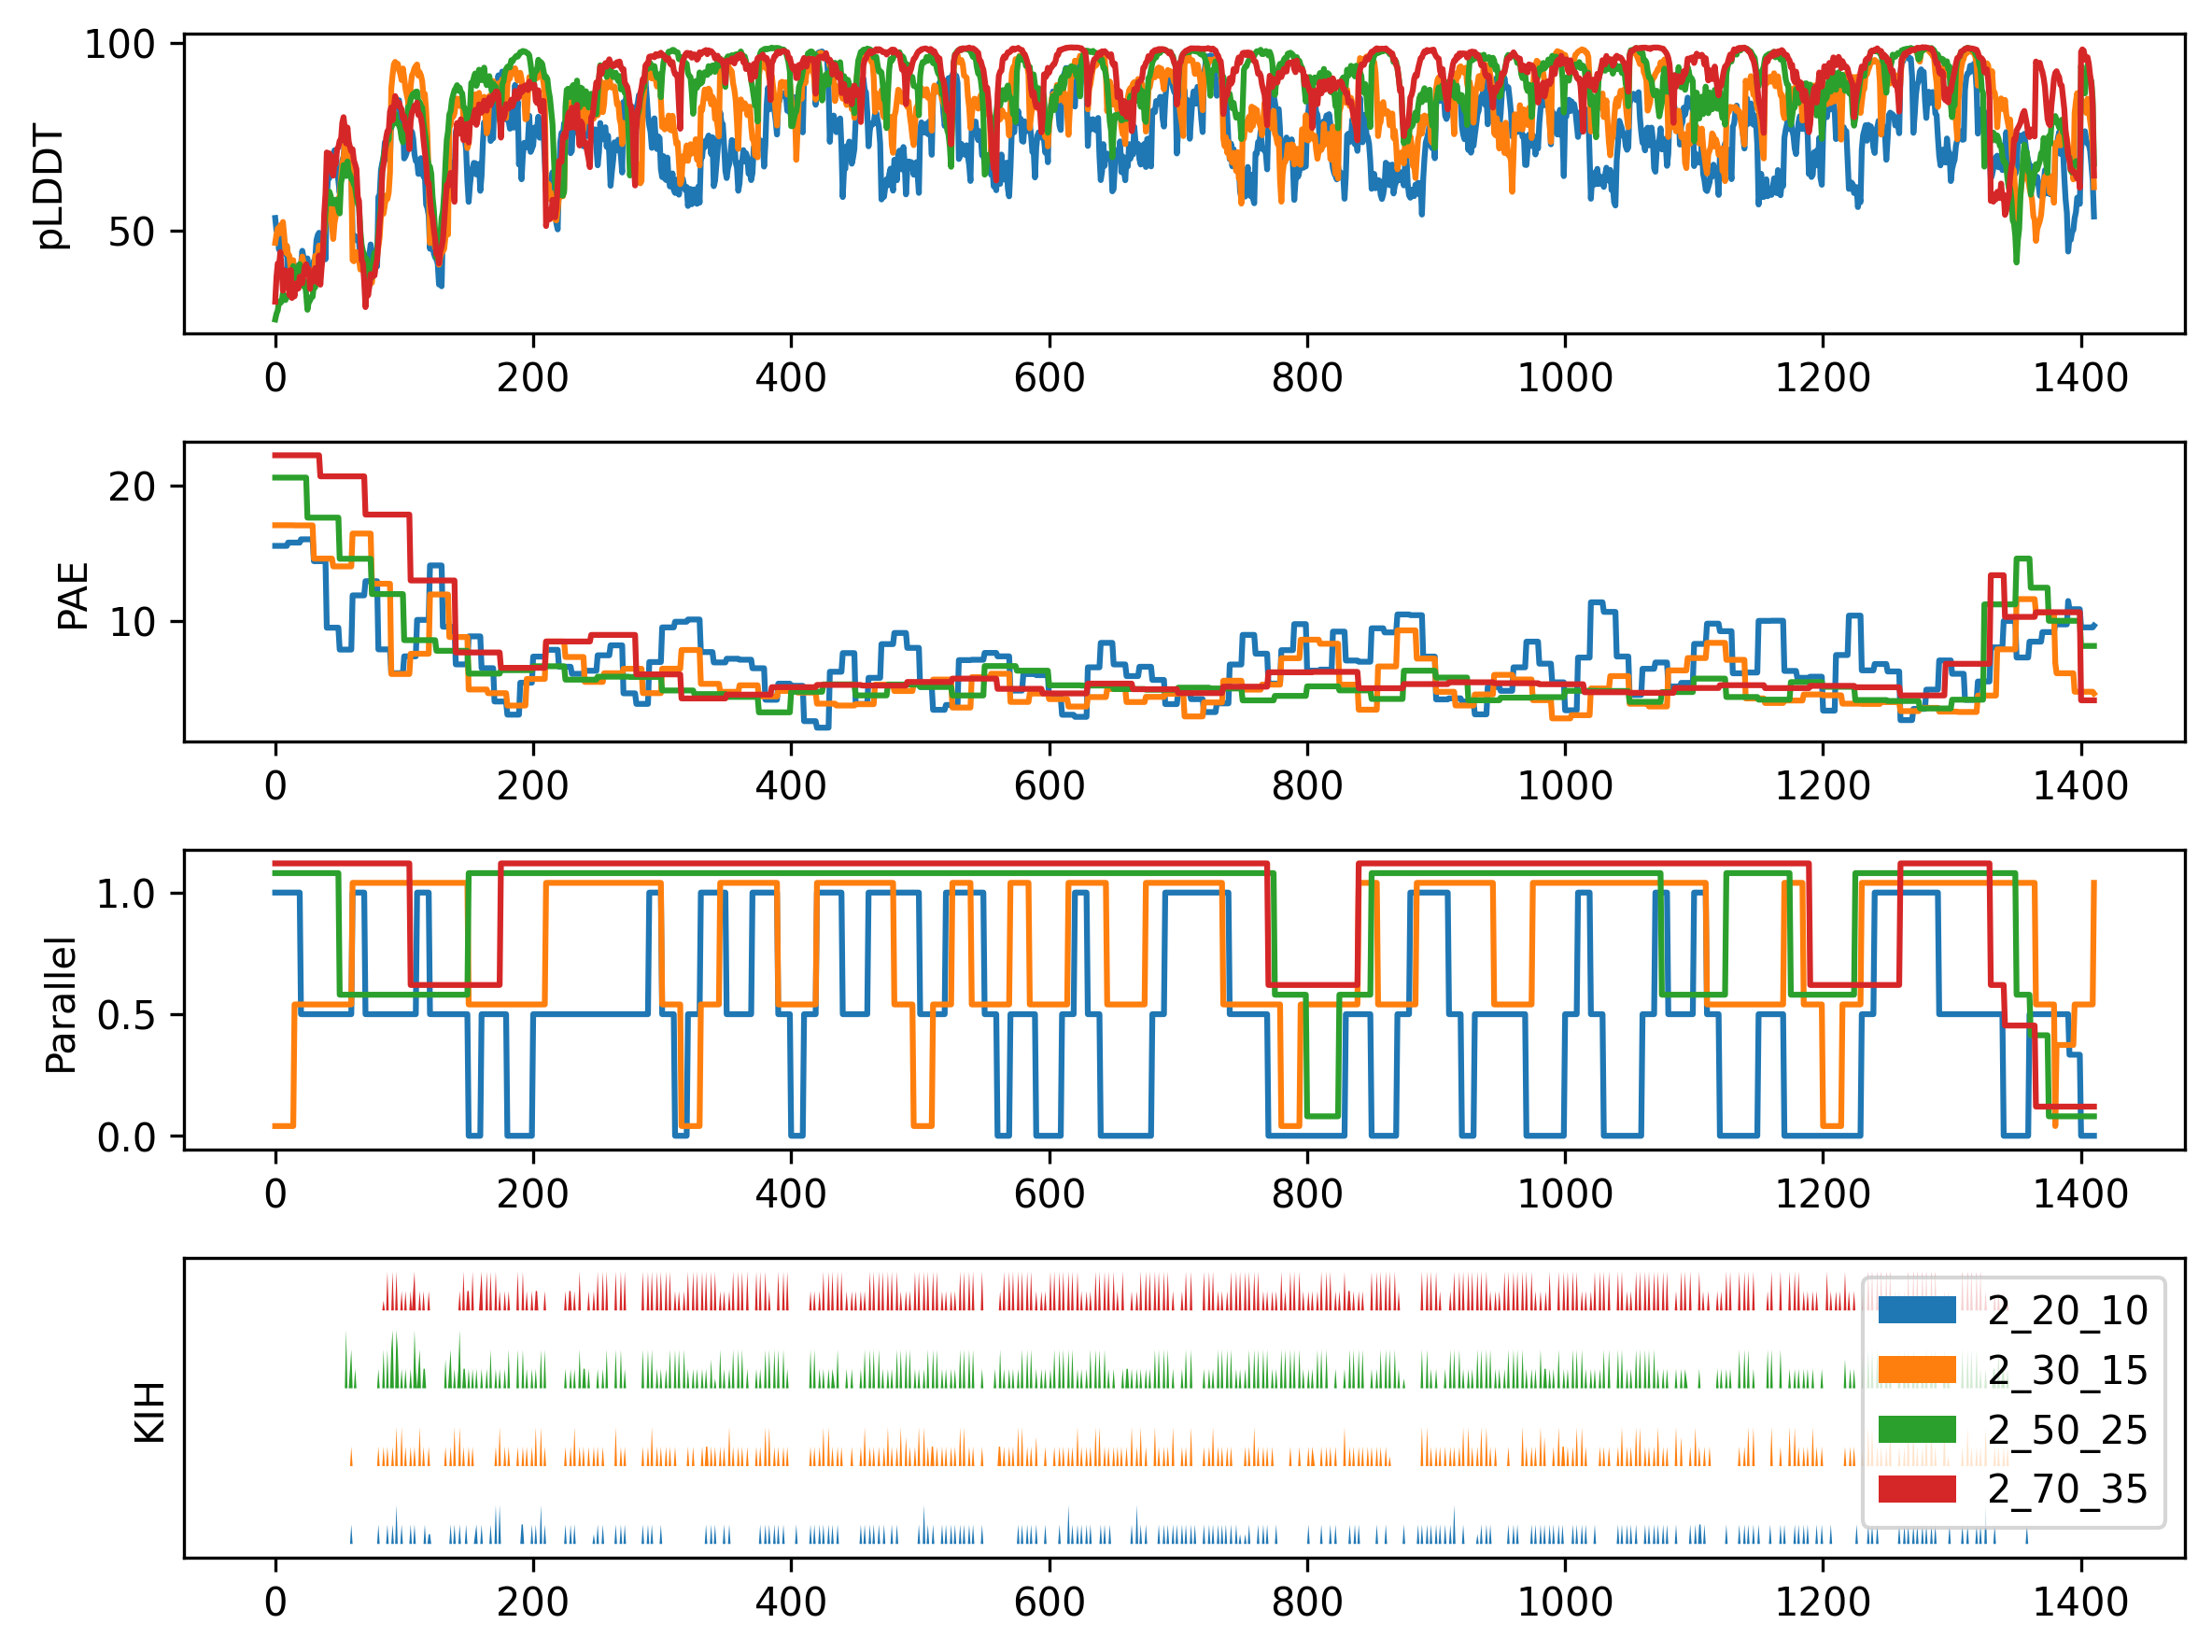

In [13]:
# graphical representation of results; notice the differences in profile between window-sizes
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6), dpi=300)

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend()
plt.tight_layout()

## ESMfold

In [14]:
# to analyze ESMfold predictions, we will provide the 'prediction_format' parameter
# the integrator will warn us that PAE is not supported by ESMfold
integrator = ccfrag.Integrator(path_fragments='CCfrag_constructs_EEA1/EEA1_HS',
                              list_features=['plddt', 'para', 'kih', 'pae'],
                              model_subfolder='predictions_esmfold',
                              prediction_format='esmfold',
                              data_output='DATA_CCfrag_ESMfold.csv')

WARNING PAE is not supported with ESMfold


In [15]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of EEA1_HS ...
EEA1_HS read as a sequence of length 1411
Found 4 specification folders:
* 2_20_10/
* 2_30_15/
* 2_50_25/
* 2_70_35/


In [16]:
df_data_sequence

,residue_name,residue_number,2_20_10_plddt,2_20_10_para,2_20_10_kih,2_30_15_plddt,2_30_15_para,2_30_15_kih,2_50_25_plddt,2_50_25_para,2_50_25_kih,2_70_35_plddt,2_70_35_para,2_70_35_kih
0,M,0,51.736875,0.0,0.0,43.841875,1.0,0.0,34.451250,1.0,0.0,44.266250,0.0,0.0
1,L,1,61.664375,0.0,0.0,56.408750,1.0,0.0,47.715000,1.0,0.0,47.318750,0.0,0.0
2,R,2,53.873182,0.0,0.0,49.570455,1.0,0.0,44.923182,1.0,0.0,42.726364,0.0,0.0
3,R,3,53.655455,0.0,0.0,49.194545,1.0,0.0,41.556818,1.0,0.0,44.097273,0.0,0.0
4,I,4,57.832500,0.0,0.0,54.849375,1.0,0.0,44.875000,1.0,0.0,47.463750,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,N,1406,41.347500,0.5,0.0,38.193438,1.0,0.0,72.152500,1.0,0.0,71.670000,0.0,0.0
1407,D,1407,41.165000,0.5,0.0,35.897813,1.0,0.0,71.206250,1.0,0.0,68.366250,0.0,0.0
1408,L,1408,39.750625,0.5,0.0,34.554688,1.0,0.0,72.634375,1.0,0.0,67.746875,0.0,0.0
1409,Q,1409,39.936667,0.5,0.0,39.520556,1.0,0.0,67.655000,1.0,0.0,61.286667,0.0,0.0


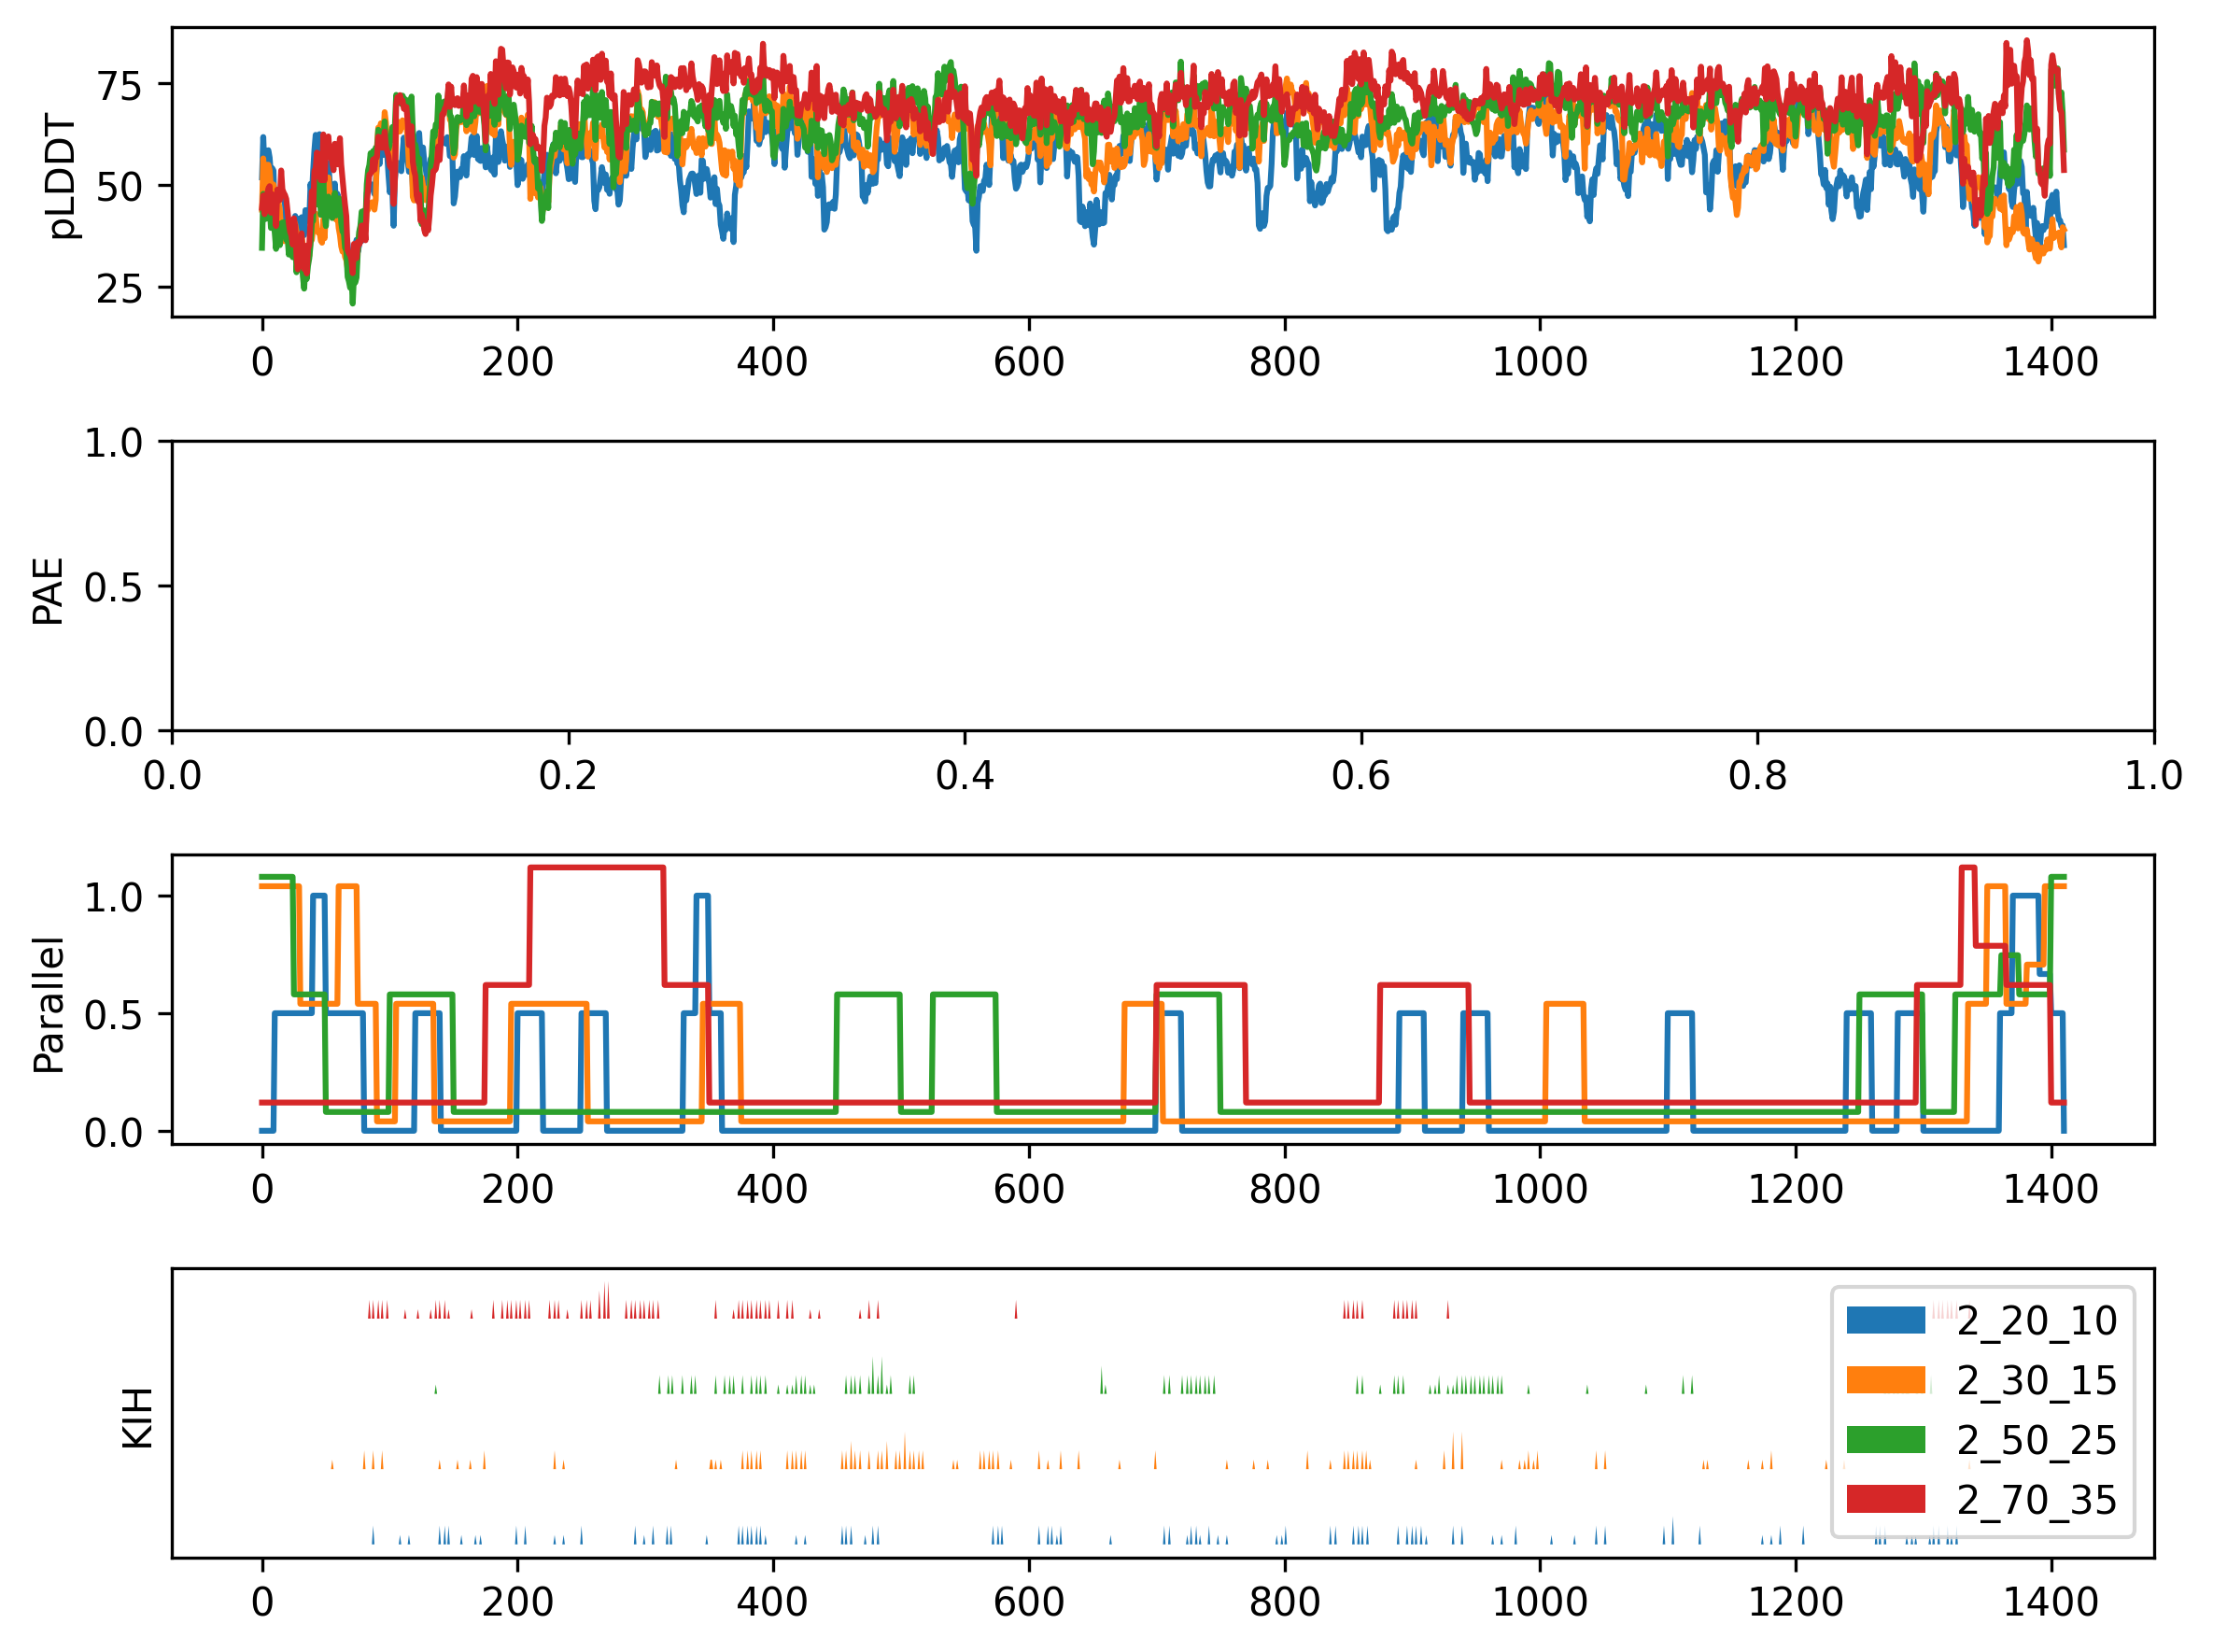

In [17]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6), dpi=300)

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    #axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend()
plt.tight_layout()

Note that, the performance of ESMfold is much poorer than ColabFold, which is to be expected. Check the `EEA1_GCN4` notebook to see how we can get better models!